# OTUS Courses EDA 
2025-02-27

* duration - продолжительность курса в месяц
* audience - описание целевой аудитории
* benefits - "профит" от курса
* plan - программа курса
* priceFull - стоимость
* priceDisc - стоимость со скидкой (если есть)
* pending - на курс пока нет набора

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('./2025-02-27.csv', delimiter=';', index_col='slug')

In [36]:
df.sample(n=3)

,title,promo,duration,presentType,audience,benefits,plan,priceFull,priceDisc,pending
slug,,,,,,,,,,
clickhouse,ClickHouse для инженеров и архитекторов БД,Все о работе с ClickHouse: от установки и наст...,4,Онлайн,"Программа разработана для тех, кто уже что-то...",В рамках курса мы рассмотрим установку ClickHo...,Знакомство с ClickHouse Знакомимся с основами ...,90000,81000,0
system_analyst,Системный аналитик. Advanced,Прокачайте свои навыки системного анализа до M...,6,Онлайн,Курс рассчитан на ИТ-аналитиков и системных а...,Программа курса позволяет системным аналитикам...,Системный анализ в структуре разработки ПО Мод...,131000,117900,0
integratorbitrix,Интегратор Битрикс24,Настройте Битрикс24 под задачи вашего бизнеса,4,Онлайн,NaN,Вы сможете настраивать Битрикс24 и подключать ...,Введение в профессию интегратор Битрикс Алгори...,69000,62100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, atomport to llm-driven-development
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        202 non-null    object
 1   promo        202 non-null    object
 2   duration     202 non-null    int64 
 3   presentType  202 non-null    object
 4   audience     142 non-null    object
 5   benefits     189 non-null    object
 6   plan         200 non-null    object
 7   priceFull    202 non-null    int64 
 8   priceDisc    202 non-null    int64 
 9   pending      202 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 17.4+ KB


Набор не полон: в набор вошло 202 курса (это не все, а только с фильтром "Тип обучения: курсы"), список курсов был собран 24 февраля.

Пропуски есть в текстовых полях: `audience`, `benefits`, `plan`

## Активные курсы

In [27]:
df['pending'].value_counts()

pending
0    138
1     64
Name: count, dtype: int64

Будем рассматривать только активные курсы

In [28]:
df_active = df[df['pending'] == 0]

## Длительность курсов

<Axes: xlabel='duration', ylabel='Count'>

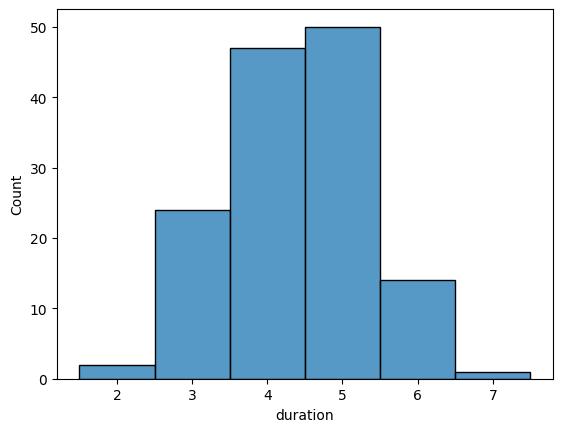

In [48]:
sns.histplot(df_active, x='duration', discrete=True)

Выглядит так, как будто признак распределен нормально! 

*kde выглядит странно для дискретной величины ...*

In [30]:
# топ-3 самых длительных курсов
df_active.sort_values(by='duration', ascending=False)[0:3]

,title,promo,duration,presentType,audience,benefits,plan,priceFull,priceDisc,pending
slug,,,,,,,,,,
setevoy-inzhener,Network Engineer. Professional,Освойте актуальные протоколы маршрутизации. И ...,7,Онлайн,"Специалистов по маршрутизации и коммутации , ...",Вы сможете настраивать и управлять сетями пред...,Основы коммутации и маршрутизации (CCNA SRWE) ...,89000,80100,0
system_analyst_basic,Системный аналитик. Basic,Погрузитесь в процесс разработки ПО: учитывайт...,6,Онлайн,NaN,Влияйте на разработку ПО с позиций системного ...,Введение в разработку ПО Модуль позволяет синх...,121000,108900,0
subd,Базы данных,Освойте все необходимые навыки для профессиона...,6,Онлайн,"DBA, решающие задачи миграции с проприетарных...",Цель курса — научить слушателя эффективно рабо...,Сущности и связи В данном модуле рассмотрим пр...,103000,92700,0


In [34]:
# топ-3 самых коротких курсов
df_active.sort_values(by='duration', ascending=True)[0:3]

,title,promo,duration,presentType,audience,benefits,plan,priceFull,priceDisc,pending
slug,,,,,,,,,,
atomport,Атом.Порт – система управления конфигурациями,"Курс о том, как быстро и безопасно мигрировать...",2,Онлайн,Бесплатный курс для всех желающих IT-специалис...,Курс поможет вам успешно справиться с массовым...,Атом. Порт Вы разберетесь с особенностями сист...,0,0,0
archimate,Archimate,"Думайте стратегически, визуализируйте с помощь...",2,Онлайн,Для архитекторов. Научитесь визуализировать в...,Что даст вам этот курс Вы научитесь: мыслить с...,ArchiMate Изучим язык моделирования ArchiMate....,67000,60300,0
loadqa,Нагрузочное тестирование,"Составляйте методику, разрабатывайте скрипты, ...",3,Онлайн,Для специалистов по ручному и автоматизирован...,Что даст вам этот курс Вы научитесь: писать ск...,Введение в нагрузочное тестирование (НТ) Вводн...,122000,109800,0


## Стоимость курсов

<Axes: xlabel='priceFull', ylabel='Count'>

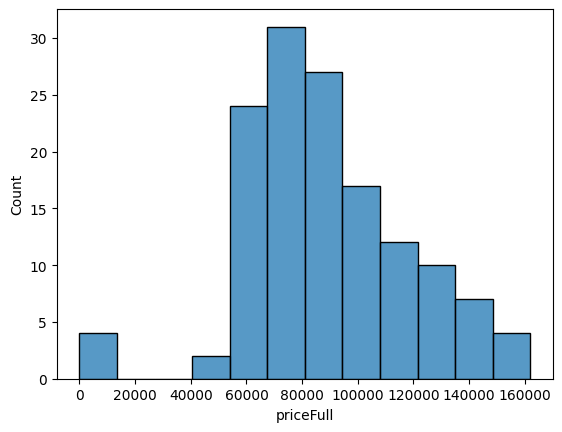

In [55]:
sns.histplot(df_active, x='priceFull')

Встречаются бесплатные курсы

In [50]:
df_active[df_active['priceFull'] == 0].shape[0]

4

In [52]:
df_active[df_active['priceFull'] == 0]

,title,promo,duration,presentType,audience,benefits,plan,priceFull,priceDisc,pending
slug,,,,,,,,,,
atomport,Атом.Порт – система управления конфигурациями,"Курс о том, как быстро и безопасно мигрировать...",2,Онлайн,Бесплатный курс для всех желающих IT-специалис...,Курс поможет вам успешно справиться с массовым...,Атом. Порт Вы разберетесь с особенностями сист...,0,0,0
otuskids_ai,Искусственный интеллект для подростков,Оставьте заявку и получите бесплатное индивиду...,5,Онлайн,NaN,NaN,Введение в искусственный интеллект и нейросети...,0,0,0
otuskids_python,Python-разработчик для подростков,Оставьте заявку и получите бесплатное индивиду...,5,Онлайн,NaN,Заключительный месяц курса посвящен проектной ...,Основы синтаксиса. Основные ключевые слова и к...,0,0,0
otuskids_literacy,Компьютерная грамотность и Scratch,Запишите вашего ребенка на бесплатный открытый...,3,Онлайн,NaN,NaN,Основы компьютера и работа в интернете В этом ...,0,0,0


Оставим только платные курсы

In [54]:
df_sale = df_active[df_active['priceFull'] != 0]

<Axes: xlabel='priceFull', ylabel='Count'>

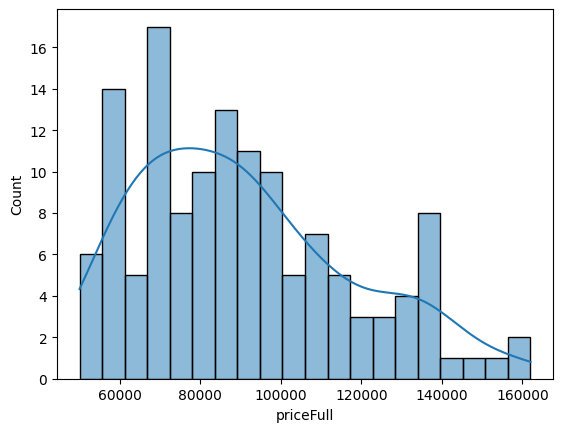

In [58]:
sns.histplot(df_sale, x='priceFull', kde=True, bins=20)

In [59]:
# топ-3 самых дешевых курсов
df_sale.sort_values(by='priceFull', ascending=True)[0:3]

,title,promo,duration,presentType,audience,benefits,plan,priceFull,priceDisc,pending
slug,,,,,,,,,,
-sql,SQL для разработчиков и аналитиков,Узнайте как сделать связку разработчик+аналити...,3,Онлайн,"Для разработчиков , которые уже знакомы с как...",NaN,Погружение в SQL Основы и первые команды Вы по...,50000,0,0
django,Django-разработчик,Создание сложных web-приложений на Django для ...,5,Онлайн,NaN,Вы сможете применять фреймворк Django в бэкенд...,Основы Python и модульного тестирования Цель в...,52500,0,0
linux-kernel,Разработка ядра Linux,Понимание ядра Linux: от архитектуры до разраб...,3,Онлайн,Для кого этот курс: Системные администраторов ...,Что даст вам этот курс Основы разработки ядра:...,Введение в разработку ядра Linux В этом модуле...,55000,0,0


In [60]:
# топ-3 самых дорогих курсов
df_sale.sort_values(by='priceFull', ascending=False)[0:3]

,title,promo,duration,presentType,audience,benefits,plan,priceFull,priceDisc,pending
slug,,,,,,,,,,
microservice-architecture,Microservice Architecture,Научитесь работе с лучшими инструментами по ра...,4,Онлайн,NaN,После обучения выпускники на профессиональном ...,Базовые паттерны микросервисных архитектур В э...,162000,145800,0
java-professional,Java Developer. Professional,Освойте создание современных Java-приложений,6,Онлайн,NaN,"Знание актуального стека технологий, 96 часов ...",Язык и платформа Java В этом модуле изучаются ...,159000,143100,0
teamlead2-0,Team Lead,"Прокачайте менеджерские навыки, освойте продви...",5,Онлайн,Для начинающих тимлидов. Избавьтесь от «синдр...,Курс «Team Lead» поможет начинающим руководите...,Общие знания Обсуждение организационных вопрос...,153000,137700,0


Если смотреть без учета скидок.

Самый дорогий курс [Microservice Architecture](https://otus.ru/lessons/microservice-architecture) - 162 000 руб.

Самый дешевый курс [SQL для разработчиков и аналитиков](https://otus.ru/lessons/-sql) - 50 000 руб.


## Скидки

In [69]:
df_discount = df_sale[df_sale['priceDisc'] != 0]

In [65]:
print(f'Активных платных курсов всего: {df_sale.shape[0]}. Со скидками: {df_discount.shape[0]}')

Активных платных курсов всего: 134. Со скидками: 84


In [71]:
# расчитаем % скидки для курсов со скидкой
df_discount.loc[:, 'percent'] = df_discount.apply(lambda row: (row['priceFull']-row['priceDisc'])/row['priceFull'], axis=1)

In [76]:
df_discount['percent'].value_counts()

percent
0.100000    82
0.097183     1
0.111765     1
Name: count, dtype: int64

Скидка всегда 10%, на сайте показывается в рублях.

Так что на распределение и топы принципиально не влияет.

## Соотношение стоимости и длительности

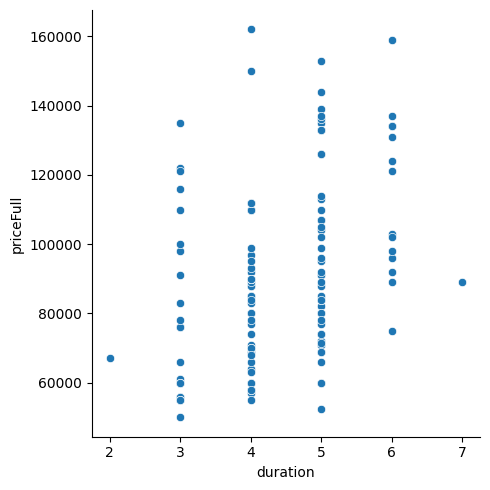

In [80]:
sns.relplot(df_sale, x='duration', y='priceFull')

Зависимости цены от длительности не наблюдается. 

## Офлайн?

In [84]:
df_sale[df_sale['presentType'] != 'Онлайн'].shape[0]

0

## Заключение

На момент анализа данных появились новые курсы, которые выбиваются из имеющихся данных, например курс [Administrator Linux](https://otus.ru/lessons/linux-specialization/), который длится 12 месяцев и стоит 207 900 ₽ (231 000 ₽)

Через какое-то время стоит повторить анализ для сравнения динамики.

Текстовые данные можно использовать для поиска похожих курсов на пересечении навыков и требований и программ. Возможно будет попробовать для fine-tune языковой модели.